# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\whitm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Add any additional import statements you need here
from matplotlib import pyplot as plt


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/whitm/OneDrive/Desktop/ADS509/M1_Assignment_Data/M1_Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens)
    num_characters = 0

    # character count
    for i in tokens:
        for c in i:
            num_characters += 1

    common = Counter(tokens).most_common(5)

    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(f"The five most common words {common} in the data.")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters, common])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The five most common words [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)] in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion can be very useful to check how your functions are working within your code. It can also be used to validate calculations being made. This can be very helpful when debugging complicated functions. Especially given that assert statements are relatively inexpensive to implement computationally. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data
artists = ['robyn','cher']

# List for lyrics and titles
r_lyrics = []
c_lyrics = []

# lists for artists names
r = []
c = []
for a in artists:
    for file in os.listdir(f'{data_location}{lyrics_folder}'+a+'/'):
        if file.endswith('.txt'):
            with open(f'{data_location}{lyrics_folder}'+a+'/'+file,'r') as data:
                if a == 'robyn':
                    r_lyrics.append(data.read())
                    r.append('Robyn')
                else:
                    c_lyrics.append(data.read())
                    c.append('Cher')
        else:
            print("Error File Not Text")

lyrics = pd.DataFrame({"artist": r+c, "lyrics": r_lyrics+c_lyrics})
lyrics.head(-5)

,artist,lyrics
0,Robyn,"""88 Days""\n\n\n\nI light a candle in the morni..."
1,Robyn,"""Ain't No Thing""\n\n\n\n[Verse 1:]\nBoy you go..."
2,Robyn,"""Anytime You Like""\n\n\n\nIt's like you're wai..."
3,Robyn,"""Baby Forgive Me""\n\n\n\nHere come the night\n..."
4,Robyn,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
...,...,...
410,Cher,"""You Better Sit Down Kids""\n\n\n\nBetter sit d..."
411,Cher,"""You Don't Have To Say You Love Me""\n\n\n\nWhe..."
412,Cher,"""You Haven't Seen The Last Of Me""\n\n\n\nFeeli..."
413,Cher,"""You Know It""\n\n\n\nYou're the kinda of girl\..."


In [7]:
# Doing a little prep work to make the normalization/transformation a little easier
titles = []
li_lyrics = []
for i in lyrics['lyrics']:
    # splitting lyrics from titles
    x, y = i.split('\n\n\n\n')
    # appending titles and lyrics for placement in a dataframe
    titles.append(x.replace('"', ''))
    li_lyrics.append(y.replace('\n',' '))

# putting new lyrics and titles columns into dataframe
lyrics['lyrics'] = li_lyrics
lyrics['titles'] = titles

In [8]:
lyrics.head(-5)

,artist,lyrics,titles
0,Robyn,I light a candle in the morning To signify th...,88 Days
1,Robyn,"[Verse 1:] Boy you gotta want me, really reall...",Ain't No Thing
2,Robyn,It's like you're waiting for me to start There...,Anytime You Like
3,Robyn,"Here come the night In your eyes Baby, be brav...",Baby Forgive Me
4,Robyn,(So you wanna go out? How you gonna get there?...,Beach 2K20
...,...,...,...
410,Cher,"Better sit down kids I'll tell you why, kids Y...",You Better Sit Down Kids
411,Cher,When I said I needed you You said you would al...,You Don't Have To Say You Love Me
412,Cher,Feeling broken Barely holding on But there's j...,You Haven't Seen The Last Of Me
413,Cher,You're the kinda of girl You can't get next to...,You Know It


In [9]:
# Read in the twitter data
# dictionary for twitter descriptions
twitter_desc = defaultdict(list)

# list
r_desc = []
c_desc = []

# loop through the artist list robyn, cher
for a in artists:

    # reading the files as a csv skipping the bad lines in the cher file and dropping the null values
    df = pd.read_csv(f"{data_location}{twitter_folder}"+a+"_followers_data.txt", sep="\t", error_bad_lines=False, warn_bad_lines=False)['description'].dropna()
    for i in list(df):
        # looping through the dataframe to save as a list for the dictionary
        if a == 'robyn':
            r_desc.append(i)
        else:
            c_desc.append(i)
        
twitter_desc['robyn'] = r_desc
twitter_desc['cher'] = c_desc
        

c:\Users\whitm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\whitm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# Example of dictionary
print(twitter_desc['robyn'][0:2])
print(twitter_desc['cher'][0:2])

['I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…', "books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️"]
['𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜', '163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡']


## Data Cleaning

Now clean and tokenize your data. Remove punctuation characters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [11]:
# not needed when using the translate method in python
#punctuation = set(punctuation) # speeds up comparison

In [12]:
# adding in some extra stopwords that were prevalent
extra_sw = ["i'm", "och", "im", "de"]
for i in extra_sw:
    sw.append(i)

#### Twitter Description Local Storage

In [13]:
# create your clean twitter data here
# storing each description in a single string and a large string to store those
clean_r = []
clean_c = []
# dict to store cleaned descriptions
clean_desc = defaultdict(list)

# for storing descriptions as one long string
r_words = []
c_words = []


# loop through keys for artist
for k in twitter_desc:
    # storing the split and casefolded strings for each artist temporarily
    splitt = []
    # loop through each value for each key
    for v in twitter_desc[k]:
        # append list with split, nonpunctuated, & casefolded values
        splitt.append(v.casefold().split())  
    # loop through split list for each artist 
    for i in splitt:
        # temporary storage for split data that has stop words removed. Remade for each description to ensure they are stored as a single list
        tmp = [] 
        # loop through each split word
        for w in i:
            # compare each word to stop word set
            if w not in sw:
                # append each word to temp list for each description
                tmp.append(w.translate(str.maketrans('', '', punctuation)))
                if k == 'robyn':
                    r_words.append(w.translate(str.maketrans('', '', punctuation)))
                else:
                    c_words.append(w.translate(str.maketrans('', '', punctuation)))
        # appending the short lists to the list clean
        if k == 'robyn':
            clean_r.append(tmp)
        else:
            clean_c.append(tmp)


       

In [14]:
# storing descriptions in "clean" dictionary
clean_desc['robyn'] = clean_r
clean_desc['cher'] = clean_c

In [15]:
rwords = [x for x in r_words if x !='']
cwords = [x for x in c_words if x !='']
rwords[0]

'love'

In [16]:
print("Length of twitter description before cleaning: ", len(twitter_desc['robyn'][0]))
print(" ")
print("Length of twitter description after cleaning: ", len(clean_desc['robyn'][0]))

Length of twitter description before cleaning:  86
 
Length of twitter description after cleaning:  9


#### Lyrics Data Extraction

In [17]:
# create your clean lyrics data here

# clean list to add to pd.DataFrame
cleaned_lyrics = []
df_count = 0
cher_lyrics = []
robyn_lyrics = []

# list to store splits before searching stopwordss
splitt = []

# loop through lyric values
for i in lyrics['lyrics']:
    # removing verse counts 
    i = i.replace('[Verse 1:]', '').replace('[Verse 2:]', '').replace('[Verse 3:]', '').replace('[Verse 4:]', '').replace('[Verse 5:]', '')

    # append lyrics without punctuation or capitalization that have also been split
    splitt.append(i.casefold().split())

# loop through the split lists
for i in splitt:
    df_count += 1
    tmp = []

    # loop through the splits lists words
    for w in i:
        
        # keep if not in stopwords set
        if w not in sw:
                    
                    # append to temp storage
                    tmp.append(w.translate(str.maketrans('', '', punctuation)))
                    
                    if lyrics['artist'].loc[df_count-1] == 'Robyn':
                        robyn_lyrics.append(w.translate(str.maketrans('', '', punctuation)))
                    else:
                        cher_lyrics.append(w.translate(str.maketrans('', '', punctuation)))

    # append to clean lyrics lists
    cleaned_lyrics.append(tmp)

lyrics['cleaned_lyrics'] = cleaned_lyrics

    

In [18]:
print("Length of 88 Days by Robyn before cleaning: ", len(lyrics['lyrics'][0]))
print(" ")
print("Length of 88 Days by Robyn after cleaning: ", len(lyrics['cleaned_lyrics'][0]))
lyrics.head()

Length of 88 Days by Robyn before cleaning:  1624
 
Length of 88 Days by Robyn after cleaning:  206


,artist,lyrics,titles,cleaned_lyrics
0,Robyn,I light a candle in the morning To signify th...,88 Days,"[light, candle, morning, signify, still, mind,..."
1,Robyn,"[Verse 1:] Boy you gotta want me, really reall...",Ain't No Thing,"[boy, gotta, want, me, really, really, want, b..."
2,Robyn,It's like you're waiting for me to start There...,Anytime You Like,"[like, waiting, start, theres, right, moment, ..."
3,Robyn,"Here come the night In your eyes Baby, be brav...",Baby Forgive Me,"[come, night, eyes, baby, brave, wise, like, m..."
4,Robyn,(So you wanna go out? How you gonna get there?...,Beach 2K20,"[so, wanna, go, out, gonna, get, there, ok, ca..."


When cleaning the data, I made two choices in storing the data. 

1. I stored both descriptions and lyrics initially in a list of lists. That way if we are interested in particular songs or maybe we want to extract albums to evaluate lexicon, that could be done.

2. Yet, doing so did not make it easy to use the descriptive statistics formula using the list of lists for each record. Instead, I also prepared a list of all words. One giant list. That was prepared just to use the descriptive statistics formula on. 

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

### Lyrics

In [19]:
# calls to descriptive_stats here
d = descriptive_stats(robyn_lyrics, verbose=True)

There are 14795 tokens in the data.
There are 2190 unique tokens in the data.
There are 71314 characters in the data.
The lexical diversity is 0.148 in the data.
The five most common words [('know', 305), ('love', 269), ('got', 249), ('like', 230), ('baby', 220)] in the data.


In [20]:
d = descriptive_stats(cher_lyrics, verbose=True)

There are 34396 tokens in the data.
There are 3748 unique tokens in the data.
There are 164843 characters in the data.
The lexical diversity is 0.109 in the data.
The five most common words [('love', 966), ('know', 480), ('baby', 315), ('time', 313), ('see', 308)] in the data.


In [21]:
d = descriptive_stats(cwords, verbose=True)

There are 16133402 tokens in the data.
There are 1698078 unique tokens in the data.
There are 96099903 characters in the data.
The lexical diversity is 0.105 in the data.
The five most common words [('love', 214529), ('life', 122900), ('music', 88168), ('follow', 62576), ('lover', 60314)] in the data.


In [22]:
d = descriptive_stats(rwords, verbose=True)

There are 1533133 tokens in the data.
There are 271452 unique tokens in the data.
There are 9388482 characters in the data.
The lexical diversity is 0.177 in the data.
The five most common words [('music', 15160), ('love', 11683), ('life', 7387), ('follow', 5602), ('like', 4946)] in the data.


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 words would certainly be full of stop words given the amount of words that were removed during the cleaning process. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Having not listened to Robyn or Cher in any substantial way, I did not have prior beliefs of one artist being more lyrically intricate than another. I do think that them being very close to one another would be expected for most popular artists that are not known particularly for their lyrics, like perhaps a Bob Dylan or someone similar. To my limited knowledge neither Cher nor Robyn are reverred as lyricists in that way. 

One thing that would remain prevalent in most musician's lyrics is love and life. Unsurprisingly music is included in this top 5 as well.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [23]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [24]:
# Your code here

# looping through the emojis to extract them from the strings
# Then appending them to a string to contain all of the emojis
cemojis = []
for i in cwords:
    for l in i:
        if emoji.is_emoji(l) == True:
            cemojis.append(l)

remojis = []
for i in rwords:
    for l in i:
        if emoji.is_emoji(l) == True:
            remojis.append(l)
   

#### Robyn Emojis

In [25]:
Counter(remojis).most_common(10)

[('❤', 4808),
 ('🌈', 4702),
 ('🏳', 3539),
 ('♥', 3117),
 ('✨', 2240),
 ('🏻', 1498),
 ('✌', 1194),
 ('🏼', 1145),
 ('♀', 848),
 ('💙', 818)]

#### Cher Emojis

In [26]:
Counter(cemojis).most_common(10)

[('❤', 79373),
 ('🌈', 47795),
 ('♥', 34239),
 ('🏳', 33591),
 ('✨', 29715),
 ('💙', 21498),
 ('🏻', 20970),
 ('🌊', 20319),
 ('✌', 16876),
 ('💜', 16607)]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [27]:
# Your code here
chashtags = []
rhashtags = []
# Looping through each word in the descriptions 
for artist in twitter_desc:
    for i in twitter_desc[artist]:
        for w in i.split():
            # if the first letter of the word is # AND if the lenghth of the word is greater than 1, append to the appropriate artist
            if w[0] == '#':
                if len(w) > 1:
                    if artist == 'robyn':
                        rhashtags.append(w)
                    else:
                        chashtags.append(w)

            
        
        

#### Robyn Hashtags

In [28]:
Counter(rhashtags).most_common(10)

[('#BlackLivesMatter', 311),
 ('#BLM', 274),
 ('#blacklivesmatter', 200),
 ('#1', 187),
 ('#music', 150),
 ('#Music', 93),
 ('#EDM', 79),
 ('#blm', 51),
 ('#TeamFollowBack', 51),
 ('#LGBTQ', 45)]

#### Cher Hashtags

In [29]:
Counter(chashtags).most_common(10)

[('#BLM', 7917),
 ('#Resist', 5003),
 ('#BlackLivesMatter', 4221),
 ('#resist', 3129),
 ('#FBR', 2765),
 ('#blacklivesmatter', 2464),
 ('#TheResistance', 2457),
 ('#1', 2228),
 ('#Resistance', 1514),
 ('#RESIST', 1415)]

#### Comments

One take away is that the fanbases of both artists are very politically active.

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [30]:
# Cleaning Title first to remove stop words
cher_cleaned_titles = []
cher_stop_titles = []
robyn_cleaned_titles = []
robyn_stop_titles = []
df_counter = 0

# list to store splits before searching stopwordss
splitt = []

# loop through lyric values
for i in lyrics['titles']:
    
    # append lyrics without punctuation or capitalization that have also been split
    splitt.append(i.casefold().split())

# loop through the split lists
for i in splitt:
    df_counter += 1

    # loop through the splits lists words
    for w in i:

        if lyrics['artist'].loc[df_counter-1] == 'Robyn':
            robyn_stop_titles.append(w.translate(str.maketrans('', '', punctuation)))
        else:
            cher_stop_titles.append(w.translate(str.maketrans('', '', punctuation)))
        
        # keep if not in stopwords set
        if w not in sw:  
                    # append to list
                    if lyrics['artist'].loc[df_counter-1] == 'Robyn':
                        robyn_cleaned_titles.append(w.translate(str.maketrans('', '', punctuation)))
                    else:
                        cher_cleaned_titles.append(w.translate(str.maketrans('', '', punctuation)))




In [31]:
# Your code here
print("Cher most popular words without stop words in title: ", Counter(cher_cleaned_titles).most_common(5))
print("Cher most popular words with stop words in title: ", Counter(cher_stop_titles).most_common(5))

Cher most popular words without stop words in title:  [('love', 38), ('man', 12), ('song', 11), ('come', 7), ('one', 7)]
Cher most popular words with stop words in title:  [('the', 54), ('you', 41), ('love', 38), ('i', 32), ('to', 28)]


In [32]:
print("Robyn most popular words without stop words in title: ", Counter(robyn_cleaned_titles).most_common(5))
print("Robyn most popular words with stop words in title: ", Counter(robyn_stop_titles).most_common(5))

Robyn most popular words without stop words in title:  [('love', 6), ('u', 4), ('thing', 3), ('girl', 3), ('tell', 3)]
Robyn most popular words with stop words in title:  [('me', 11), ('you', 8), ('the', 8), ('my', 8), ('to', 6)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


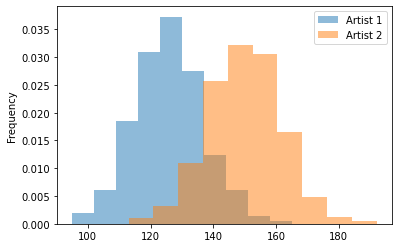

In [33]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s matches any whitespace character while + is telling the regex code to act greedy, meaning it will grab as much whitespace as is there rather than 1 or the first or the last, for example. 


In [34]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [35]:
# Your lyric length comparison chart here. 

# for length list
lenlyric = []

for i in lyrics['lyrics']:
    # removing non lyrics that are placeholders
    i = i.replace('[Verse 1:]', '').replace('[Verse 2:]', '').replace('[Verse 3:]', '').replace('[Verse 4:]', '').replace('[Verse 5:]', '').replace('(', '').replace(')', '')

    # using the tokenizer to remove space
    lyr = tokenize_lyrics(i)

    # remove the empty segments in the list
    lyr = [x for x in lyr if x !='']

    # append length to the list
    lenlyric.append(len(lyr))

# adding it to our dataframe lyrics
lyrics['len_lyrics'] = lenlyric

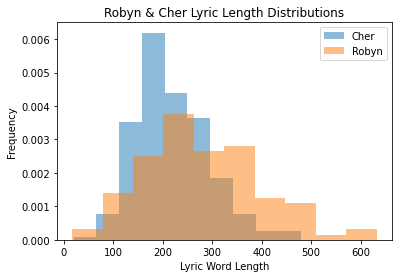

In [36]:
lyrics.groupby('artist')['len_lyrics'].plot(kind="hist",density=True,alpha=0.5,legend=True)
plt.title("Robyn & Cher Lyric Length Distributions")
plt.xlabel("Lyric Word Length")
plt.show()

As Shown above Robyn overall does have longer songs and more spread out lengths. This may be due to Cher being more pure pop song, for sale writing while Robyn maintained being a little more experimental at least with song word length if nothing else. 